<a href="https://colab.research.google.com/github/TranThiDieuHien/DOAN_IOT/blob/main/Code_DoAn_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import requests
import csv
import datetime
import time
import os

# URL của Thingspeak để lấy dữ liệu sensor
thingspeak_url = "https://api.thingspeak.com/channels/2315582/feeds.json?api_key=L4UP07991VIZ8ZUW&days=10"

# Đường dẫn và tên file CSV để lưu dữ liệu
csv_file_path = "data.csv"

# Hàm ghi dữ liệu sensor vào tệp CSV
def write_sensor_data_to_csv(csv_file_path, sensor_data):
    file_exists = os.path.isfile(csv_file_path)
    with open(csv_file_path, mode='a', newline='') as csv_file:
        sensor_fields = list(sensor_data.keys())
        writer = csv.DictWriter(csv_file, fieldnames=sensor_fields)

        # Ghi tiêu đề các trường dữ liệu (chỉ ghi một lần khi file chưa tồn tại)
        if not file_exists:
            writer.writeheader()

        # Ghi dữ liệu từ sensor vào file CSV
        writer.writerow(sensor_data)

# Hàm lấy dữ liệu từ Thingspeak
def get_sensor_data():
    response = requests.get(thingspeak_url)
    data = response.json()

    # Kiểm tra xem dữ liệu có tồn tại không
    if "feeds" in data:
        sensor_data_list = data["feeds"]
        return sensor_data_list

    return None

# Hàm chạy chương trình ghi dữ liệu
def run_program():
    # Lấy dữ liệu từ Thingspeak
    sensor_data_list = get_sensor_data()

    if sensor_data_list is not None:
        for sensor_data in sensor_data_list:
            # Lấy thời gian hiện tại
            current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            sensor_data["timestamp"] = current_time

            # Ghi dữ liệu từ sensor vào tệp CSV
            write_sensor_data_to_csv(csv_file_path, sensor_data)

# Chạy chương trình
run_program()

In [81]:
import pandas as pd
df = pd.read_csv("data.csv")
print(df.head)

<bound method NDFrame.head of                 created_at  entry_id  field1  field2            timestamp
0     2023-12-27T07:22:20Z      3461    18.1    98.0  2024-01-06 07:01:03
1     2023-12-27T07:23:03Z      3462    17.9    98.0  2024-01-06 07:01:03
2     2023-12-27T07:23:25Z      3463    17.9    98.0  2024-01-06 07:01:03
3     2023-12-27T07:23:46Z      3464    17.9    98.0  2024-01-06 07:01:03
4     2023-12-27T07:24:08Z      3465    17.9    98.0  2024-01-06 07:01:03
...                    ...       ...     ...     ...                  ...
7995  2024-01-06T06:33:56Z     11456    26.7    74.0  2024-01-06 07:01:04
7996  2024-01-06T06:39:04Z     11457    27.1    73.0  2024-01-06 07:01:04
7997  2024-01-06T06:40:05Z     11458    27.1    73.0  2024-01-06 07:01:04
7998  2024-01-06T06:46:45Z     11459    27.1    73.0  2024-01-06 07:01:04
7999  2024-01-06T06:47:16Z     11460    27.6    73.0  2024-01-06 07:01:04

[8000 rows x 5 columns]>


(created_at
2023-12-27 00:00:00+00:00    18.647500
2023-12-28 00:00:00+00:00    19.904503
2023-12-29 00:00:00+00:00    20.508944
2023-12-30 00:00:00+00:00    21.317021
2023-12-31 00:00:00+00:00    24.261982
2024-01-01 00:00:00+00:00    23.782836
2024-01-02 00:00:00+00:00    23.740327
2024-01-03 00:00:00+00:00    26.268960
2024-01-04 00:00:00+00:00    24.950667
2024-01-05 00:00:00+00:00    25.180795
2024-01-06 00:00:00+00:00    27.000000
Freq: D, Name: field1, dtype: float64, created_at
2023-12-27 00:00:00+00:00    97.357692
2023-12-28 00:00:00+00:00    96.921192
2023-12-29 00:00:00+00:00    97.485915
2023-12-30 00:00:00+00:00    97.980851
2023-12-31 00:00:00+00:00    92.598198
2024-01-01 00:00:00+00:00    94.641791
2024-01-02 00:00:00+00:00    95.122616
2024-01-03 00:00:00+00:00    82.662080
2024-01-04 00:00:00+00:00    78.493333
2024-01-05 00:00:00+00:00    72.675497
2024-01-06 00:00:00+00:00    73.571429
Freq: D, Name: field2, dtype: float64)


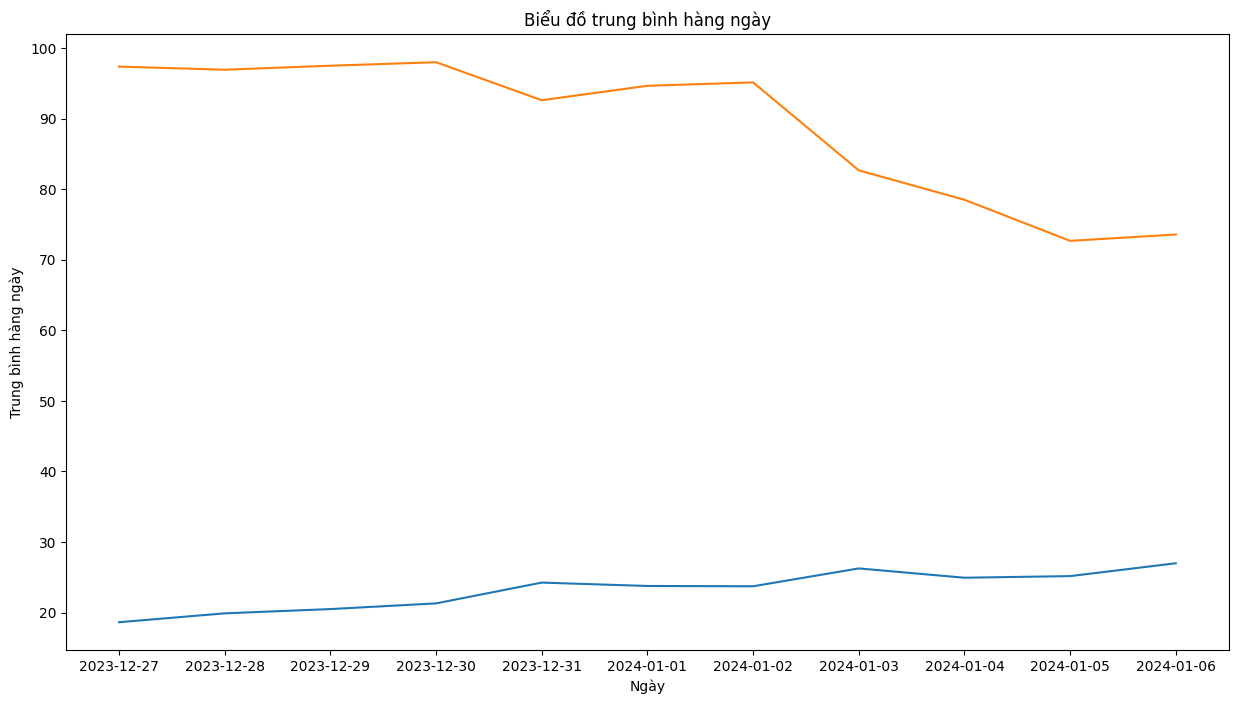

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Hàm tính trung bình hàng ngày
def calculate_daily_average(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['field1'] = pd.to_numeric(df['field1'], errors='coerce')
    df['field2'] = pd.to_numeric(df['field2'], errors='coerce')
    df.dropna(subset=['field1'], inplace=True)
    df.dropna(subset=['field2'], inplace=True)
    df.set_index('created_at', inplace=True)
    daily_average_t = df['field1'].resample('D').mean()
    daily_average_h = df['field2'].resample('D').mean()
    return daily_average_t, daily_average_h

# Hàm vẽ biểu đồ trung bình hàng ngày
def plot_daily_average(daily_average):
    daily_average_t, daily_average_h = daily_average
    plt.figure(figsize=(15, 8))
    plt.plot(daily_average_t.index, daily_average_t.values, label = "Nhiệt độ")
    plt.plot(daily_average_h.index, daily_average_h.values, label = "Độ ẩm")
    #plt.xticks(daily_average_t.index)
    plt.xlabel('Ngày')
    plt.ylabel('Trung bình hàng ngày')
    plt.title('Biểu đồ trung bình hàng ngày')
    plt.show()

# Tính toán trung bình hàng ngày
daily_average = calculate_daily_average(df)
print(daily_average)
# Vẽ biểu đồ trung bình hàng ngày
plot_daily_average(daily_average)